In [276]:
# Importar bibliotecas necesarias para la red neuronal
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Cargar los datos generados por el Modelo_correlacion

In [277]:
df = pd.read_csv(r'C:\Users\DAVID\Desktop\MECANICA_ROCAS_FREEFEM\MODELO_PREDICCION_SOSTENIMIENTO\DATA\datos_red_neurona_3.csv')

Previsualizar los datos 

In [278]:
df.head()

,Frecuencia_Chasquido_Hz,Amplitud_Chasquido_dB,Esfuerzo_Vertical_MPa,Esfuerzo_Horizontal_MPa,Profundidad,Humedad_Roca_%,Temperatura,Tipo_Fractura,Resistencia_Compresion_MPa,Modulo_Elasticidad_MPa,Numero_Pulsaciones,Tipo_Sostenimiento
0,112,117,19.811152,25.430967,409.840473,4.248918,20.480477,1,242.425895,54.161153,1059,3
1,189,189,44.866565,21.133087,121.259589,1.978634,20.544223,2,108.374145,51.506112,2372,3
2,102,144,43.142512,3.718293,943.986510,1.897602,23.678305,1,208.642434,54.287256,2244,3
3,24,192,14.480618,14.670532,1080.215309,4.641185,47.810023,2,115.446672,52.788908,2877,3
4,116,154,33.093068,20.876889,497.010948,0.855655,35.153701,2,228.626105,50.582407,2643,3


Obtener los nombres de las columnas 


In [279]:
columnas = df.columns.to_list()
columnas.pop(-1)
columnas

['Frecuencia_Chasquido_Hz',
 'Amplitud_Chasquido_dB',
 'Esfuerzo_Vertical_MPa',
 'Esfuerzo_Horizontal_MPa',
 'Profundidad',
 'Humedad_Roca_%',
 'Temperatura',
 'Tipo_Fractura',
 'Resistencia_Compresion_MPa',
 'Modulo_Elasticidad_MPa',
 'Numero_Pulsaciones']

In [280]:
# Seleccionar las características de entrada (X)
X = df[columnas]
# La variable objetivo (y)
y = df['Tipo_Sostenimiento']

Definir el modelo de Entrenamiento

In [281]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificación de la variable objetivo para clasificación multiclase
y_encoded = to_categorical(y, num_classes=4)

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = Sequential([
    Dense(128, input_dim=X_train.shape[1]),  # Capa de entrada
    LeakyReLU(alpha=0.1),  # Función de activación Leaky ReLU
    Dropout(0.5),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(32),
    Dense(4, activation='softmax')  # Capa de salida con 4 neuronas (una para cada clase)
])


# Adam 
 - Algoritmo de optimización potente y flexible que ajusta dinámicamente la tasa de aprendizaje para cada parámetro, utilizando la información del primer y segundo momento de los gradientes.

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8205 - loss: 0.5084 - val_accuracy: 0.9475 - val_loss: 0.1198
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.1269 - val_accuracy: 0.9605 - val_loss: 0.1004
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1030 - val_accuracy: 0.9650 - val_loss: 0.0934
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9625 - loss: 0.1029 - val_accuracy: 0.9615 - val_loss: 0.0903
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9637 - loss: 0.0963 - val_accuracy: 0.9670 - val_loss: 0.0883
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9655 - loss: 0.0890 - val_accuracy: 0.9660 - val_loss: 0.0826
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.0892 - val_accuracy: 0.9675 - val_loss: 0.0865
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.0876 - val_accuracy: 0.

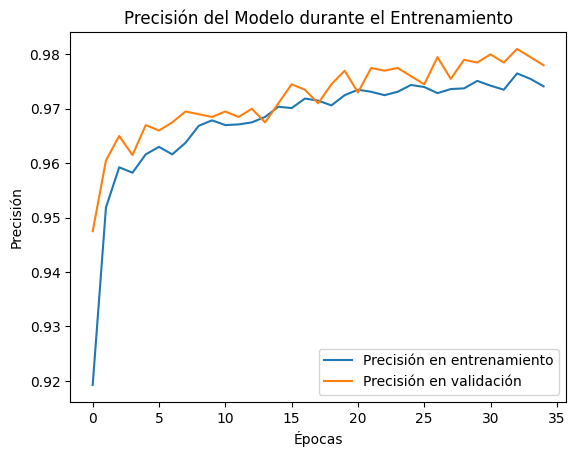

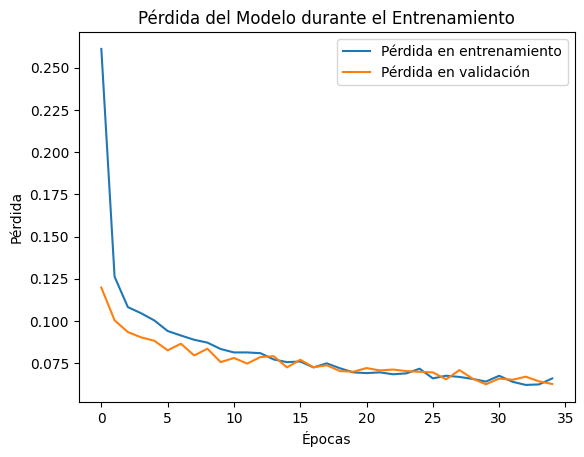

In [282]:

#! Cambiar el optimizador a RMSprop o Adam
optimizer = Adam(learning_rate=0.001)  # Puedes experimentar con el learning rate

# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Graficar el desempeño del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



Precision Entrenamineto 
 - Es la medida de qué tan bien el modelo predice las etiquetas o valores correctos sobre los datos que utilizó para aprender 
 
Precision Validacion
 - Es la medida de qué tan bien el modelo predice las etiquetas o valores correctos sobre un conjunto de datos que no utilizó durante el entrenamiento

Perdidad en entrenamiento
 - Nos indica qué tan bien el modelo se ajusta a los datos que ha visto durante el entrenamiento.
 - Una pérdida baja en entrenamiento significa que el modelo está aprendiendo las relaciones en los datos.

Perdidad en Validacion
 - Nos indica qué tan bien el modelo generaliza a nuevos datos que no ha visto durante el entrenamiento.
 - Una pérdida baja en validación significa que el modelo es capaz de hacer buenas predicciones en datos desconocidos.

 ## Introducir datos para predecir el tipo de sotenimiento 

In [283]:
diccionario = [{'Frecuencia_Chasquido_Hz':123,
                'Amplitud_Chasquido_dB': 150,
                'Esfuerzo_Vertical_MPa': 12.5,
                'Esfuerzo_Horizontal_MPa': 10,
                'Profundidad': 500,
                'Humedad_Roca_%': 2.3,
                'Temperatura': 30.5,
                'Tipo_Fractura': 1,
                'Resistencia_Compresion_MPa': 180,
                'Modulo_Elasticidad_MPa': 60,
                'Numero_Pulsaciones': 1000}]


# Tipos de sostenimiento comúnmente utilizados:

 -Tipo 0 (No necesario): Aquí, la roca es suficientemente estable como para no requerir un gran soporte. El uso de estos materiales e instrumentos es mínimo.

 -Tipo 1 (Sostenimiento moderado): En estos casos, el terreno es relativamente estable, pero se puede usar mallas o pernos de anclaje en áreas donde hay ligera inestabilidad.

 -Tipo 2 (Fuerte): Aquí, los materiales como cimbras, mallas, y pernos son esenciales. También se puede requerir el uso de resinas o hormigón en áreas con más inestabilidad.

 -Tipo 3 (Muy fuerte): En estas situaciones, se necesitan sistemas de anclaje más fuertes, mallas de acero de alta resistencia, hormigón y monitoreo constante para garantizar que el terreno se mantenga estable.

In [284]:
# Hacer la predicción con nuevos datos
input_data = pd.DataFrame(diccionario)

# Normalizar los datos de entrada
input_data_scaled = scaler.transform(input_data)

# Hacer la predicción
prediccion = model.predict(input_data_scaled)
tipo_sostenimiento_predicho = np.argmax(prediccion, axis=1)

print(f"El tipo de sostenimiento predicho es: {tipo_sostenimiento_predicho[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
El tipo de sostenimiento predicho es: 1
